In [26]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


base_dir = 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\raj\\Mamogrmas\\breast-density-prediction\\train\\train'
img_dir = os.path.join(base_dir, "images")
mask_dir = os.path.join(base_dir, "breast_masks")
dense_dir = os.path.join(base_dir, "dense_masks")
csv_path = "C:\\Users\\Lenovo\\OneDrive\\Desktop\\raj\\Mamogrmas\\breast-density-prediction\\train\\train\\train.csv"


df = pd.read_csv(csv_path)


def load_data(df, img_dir, mask_dir, dense_dir, img_size=(224, 224)):
    X, y = [], []
    
    for _, row in df.iterrows():
        img_path = os.path.join(img_dir, row['Filename'])
        mask_path = os.path.join(mask_dir, row['Filename'])
        dense_path = os.path.join(dense_dir, row['Filename'])
        
     
        img = Image.open(img_path).convert('L').resize(img_size)
        mask = Image.open(mask_path).convert('L').resize(img_size)
        dense_mask = Image.open(dense_path).convert('L').resize(img_size)
        
   
        img = np.array(img) / 255.0
        mask = np.array(mask) / 255.0
        dense_mask = np.array(dense_mask) / 255.0
        
       
        combined = np.stack([img, mask, dense_mask], axis=-1)
        
      
        X.append(combined)
        y.append(row['Density'])
    
    return np.array(X), np.array(y)


X, y = load_data(df, img_dir, mask_dir, dense_dir)






In [27]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.29803922, 0.        , 0.        ],
         [0.55686275, 0.        , 0.        ],
         [0.77254902, 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.23137255, 0.        , 0.        ],
         [0.54509804, 0.        , 0.        ],
         [0.82745098, 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.15294118, 0.        , 0.        ],
         [0.53333333, 0.        , 0.        ],
         [0.85098039, 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

(596, 224, 224, 3)
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.29803922 0.         0.        ]
  [0.55686275 0.         0.        ]
  [0.77254902 0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.23137255 0.         0.        ]
  [0.54509804 0.         0.        ]
  [0.82745098 0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.15294118 0.         0.        ]
  [0.53333333 0.         0.        ]
  [0.85098039 0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.  

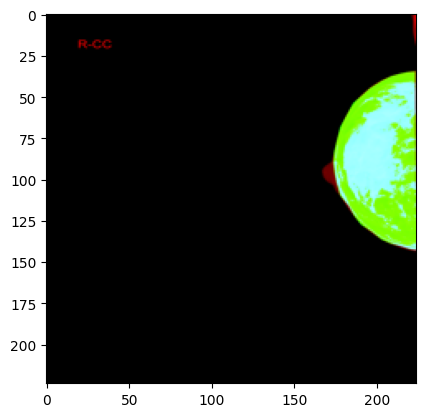

In [28]:
print(X.shape)  
print(X[0])      
plt.imshow(X[0]) 
plt.show()


In [29]:
y

array([55, 55, 70, 42, 50, 18, 60,  8, 55, 40, 40,  8,  3, 35, 40, 24, 15,
       18, 15, 15, 10, 12, 18, 55, 15,  8, 15, 20, 55, 28, 15, 60, 40,  8,
       20,  3, 24, 30, 35,  3, 76,  5, 18, 18, 26, 10, 20, 15, 23, 65, 20,
        8, 15, 24,  8, 80, 20, 70, 55, 60, 55, 30, 55, 26, 76, 12, 55, 40,
       60, 40, 40, 15, 55, 18,  8, 15, 20, 15, 35, 15, 55, 20, 28, 15, 35,
       30, 80, 35, 10, 20, 15, 76, 10,  8, 10, 70,  8,  3,  3, 40, 15, 24,
       20, 60, 30, 55, 10, 60, 40, 18, 28, 26, 40, 35, 26, 30, 60, 10, 20,
       24, 20, 30,  8, 45, 30, 20, 20, 40, 35, 30, 60, 55, 60, 20, 20, 18,
       26, 30, 40, 55, 55, 40, 10, 10, 40, 30, 30, 10, 15, 15, 24, 15, 55,
        5, 20, 15, 52, 40,  8, 76, 20, 40, 60, 55, 10, 40, 15, 49, 26, 35,
       40, 20, 20, 48, 30, 51, 40, 20, 51, 51, 15, 10,  1, 85, 20, 15, 26,
       40, 30, 20, 20, 15, 26, 15,  8, 10, 18, 45, 18, 15, 24, 30, 30, 26,
       30, 40, 20, 30, 40, 76, 35, 20, 35, 24, 30, 55, 45, 10, 35, 24, 24,
       30, 45, 20, 80, 35

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

# Custom layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))  

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



In [51]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32) 

Epoch 1/10
15/15 [==============================] - 78s 5s/step - loss: 535.1863 - mae: 18.5730 - val_loss: 381.0078 - val_mae: 15.8445
Epoch 2/10
15/15 [==============================] - 83s 6s/step - loss: 313.6715 - mae: 14.5960 - val_loss: 309.0780 - val_mae: 14.4926
Epoch 3/10
15/15 [==============================] - 80s 5s/step - loss: 211.4367 - mae: 11.8285 - val_loss: 236.3462 - val_mae: 12.5556
Epoch 4/10
15/15 [==============================] - 79s 5s/step - loss: 174.6210 - mae: 10.6866 - val_loss: 188.7026 - val_mae: 10.8928
Epoch 5/10
15/15 [==============================] - 84s 6s/step - loss: 156.7699 - mae: 9.7315 - val_loss: 160.0574 - val_mae: 10.5767
Epoch 6/10
15/15 [==============================] - 79s 5s/step - loss: 114.2957 - mae: 8.2720 - val_loss: 133.0719 - val_mae: 9.3468
Epoch 7/10
15/15 [==============================] - 81s 5s/step - loss: 103.0353 - mae: 7.7374 - val_loss: 125.9344 - val_mae: 8.7156
Epoch 8/10
15/15 [==============================] - 7

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = model.predict(X_val)


print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_val, y_pred))
print("R² Score:", r2_score(y_val, y_pred))


4/4 [==============================] - 14s 3s/step
Mean Absolute Error (MAE): 7.948391477266948
Mean Squared Error (MSE): 102.48959549188524
R² Score: 0.7825692296028137


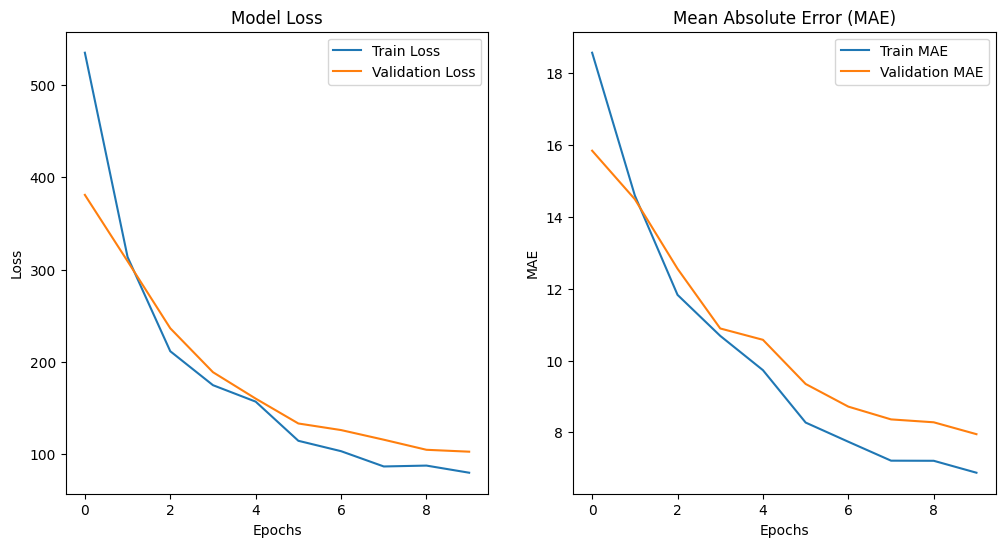

In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [56]:

model.save('breast_cancer_model_mamogram.h5')
